### Importação dos dados



In [4]:
!pip install pandas

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [7]:
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

print(f"Total de linhas: {lojas.shape[0]}")
lojas.sample(5)


Total de linhas: 9435


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
3211,Cômoda,moveis,361.15,20.169999,17/03/2022,Thiago Silva,SP,4,boleto,1,-22.19,-48.79,Loja 2
3402,Cama king,moveis,1152.46,58.949467,21/08/2020,Lucas Oliveira,RJ,5,cartao_credito,2,-22.25,-42.66,Loja 2
1667,Geladeira,eletrodomesticos,2829.24,150.937295,10/04/2020,Mariana Ferreira,DF,5,cartao_credito,8,-15.83,-47.86,Loja 1
1115,Cama king,moveis,970.05,54.816061,02/04/2022,Juliana Costa,MT,3,cartao_credito,2,-12.64,-55.42,Loja 1
7963,Impressora,eletronicos,354.66,19.415683,17/01/2023,Bruno Rodrigues,MG,5,boleto,1,-18.10,-44.38,Loja 4


#1. Análise do faturamento



,Faturamento
Loja,
Loja 1,"1,616,347.09"
Loja 2,"1,567,773.22"
Loja 3,"1,542,047.69"
Loja 4,"1,458,253.46"


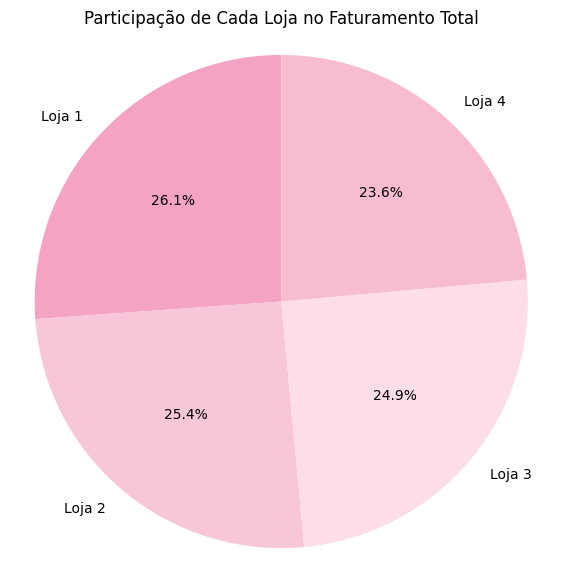

In [22]:
# Criar coluna de faturamento
lojas['Faturamento'] = lojas['Preço'] + lojas['Frete']

# Calcular faturamento total por loja
faturamento_lojas = (
    lojas.groupby('Loja')['Faturamento']
         .sum()
         .sort_values(ascending=False)
         .round(2)
)
display(faturamento_lojas)

# Gráfico único — Pizza (rosa claro)
plt.figure(figsize=(7,7))
plt.pie(
    faturamento_lojas.values,
    labels=faturamento_lojas.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#f4a3c4', '#f7c6d9', '#fddde6', '#f8bcd0']
)
plt.title('Participação de Cada Loja no Faturamento Total')
plt.axis('equal')  # mantém formato circular
plt.show()


# 2. Vendas por Categoria

,Loja,Categoria do Produto,Qtde_Vendas
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182


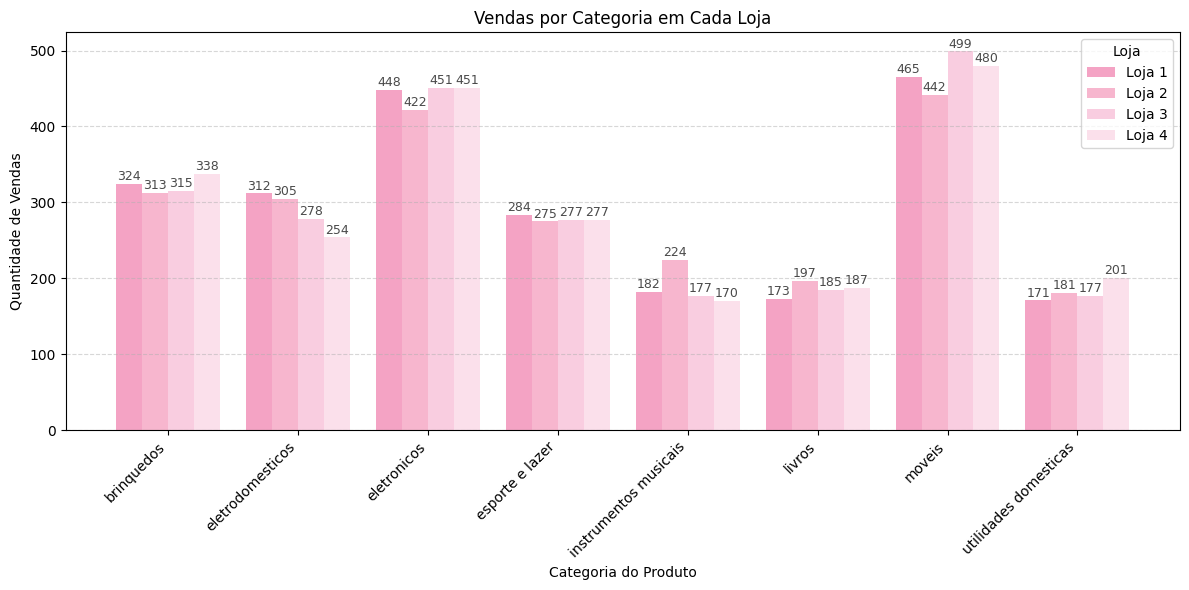

In [27]:
# Calcular quantidade de produtos vendidos por categoria em cada loja
vendas_categoria_loja = (
    lojas.groupby(['Loja', 'Categoria do Produto'])['Produto']
         .count()
         .reset_index()
         .rename(columns={'Produto': 'Qtde_Vendas'})
)

display(vendas_categoria_loja.head())

# Paleta harmonizada de tons rosa claros para as lojas
cores_rosa = ['#f4a3c4', '#f7b6ce', '#f9cde0', '#fbe0eb']

# Gráfico — barras agrupadas com rótulos de dados
plt.figure(figsize=(12,6))

categorias = vendas_categoria_loja['Categoria do Produto'].unique()
largura_barra = 0.2

for i, loja in enumerate(vendas_categoria_loja['Loja'].unique()):
    subset = vendas_categoria_loja[vendas_categoria_loja['Loja'] == loja]
    posicoes = [p + i*largura_barra for p in range(len(subset))]

    barras = plt.bar(
        posicoes,
        subset['Qtde_Vendas'],
        width=largura_barra,
        label=loja,
        color=cores_rosa[i]
    )

    # Adicionar rótulos de dados
    for barra in barras:
        altura = barra.get_height()
        plt.text(
            barra.get_x() + barra.get_width()/2,
            altura + 1,
            f'{int(altura)}',
            ha='center', va='bottom', fontsize=9, color='#4a4a4a'
        )

plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(
    [p + 1.5*largura_barra for p in range(len(categorias))],
    categorias,
    rotation=45,
    ha='right'
)
plt.legend(title='Loja')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas


,Avaliação da compra
Loja,
Loja 3,4.05
Loja 2,4.04
Loja 4,4.00
Loja 1,3.98


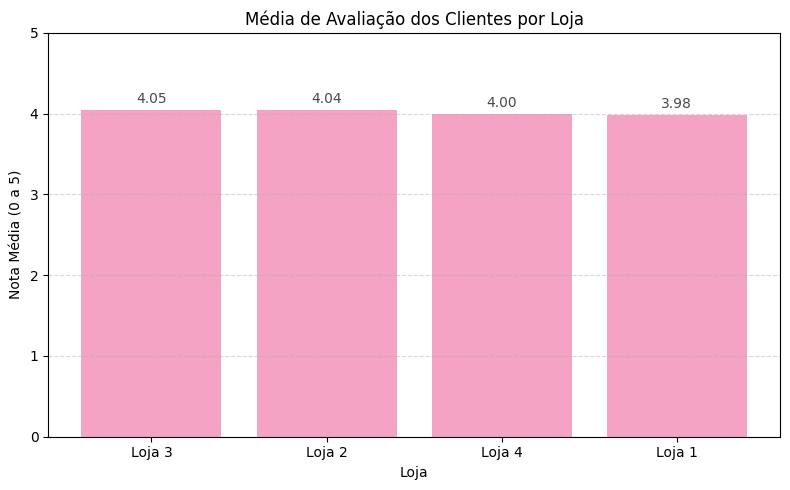

In [28]:
# Calcular a média das avaliações por loja
avaliacao_media = (
    lojas.groupby('Loja')['Avaliação da compra']
         .mean()
         .round(2)
         .sort_values(ascending=False)
)

display(avaliacao_media)

# Gráfico — barras verticais (rosa claro) com rótulos de dados
plt.figure(figsize=(8,5))
barras = plt.bar(avaliacao_media.index, avaliacao_media.values, color='#f4a3c4')

# Adicionar rótulos de dados acima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura + 0.05,
        f'{altura:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='#4a4a4a'
    )

plt.title('Média de Avaliação dos Clientes por Loja')
plt.xlabel('Loja')
plt.ylabel('Nota Média (0 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

,Loja,Produto_Mais_Vendido,Qtde_Mais_Vendido,Produto_Menos_Vendido,Qtde_Menos_Vendido
0,Loja 1,Guarda roupas,60,Celular ABXY,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


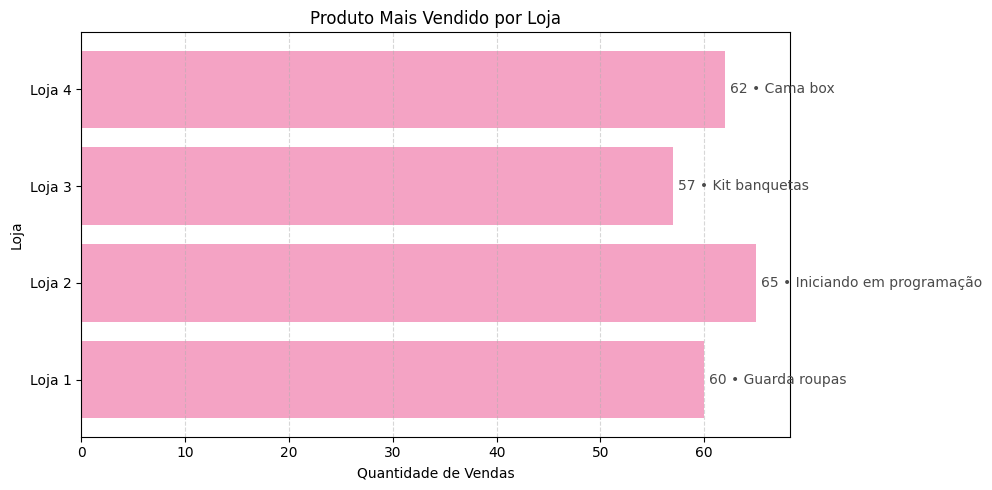

In [37]:
# Contar vendas de cada produto por loja
vendas_produto_loja = (
    lojas.groupby(['Loja', 'Produto'])['Produto']
         .count()
         .reset_index(name='Qtde_Vendas')
)

# Produto mais vendido por loja
mais_vendidos = (
    vendas_produto_loja.sort_values(['Loja', 'Qtde_Vendas'], ascending=[True, False])
                       .groupby('Loja')
                       .first()
                       .reset_index()
                       .rename(columns={'Produto': 'Produto_Mais_Vendido', 'Qtde_Vendas': 'Qtde_Mais_Vendido'})
)

# Produto menos vendido por loja
menos_vendidos = (
    vendas_produto_loja.sort_values(['Loja', 'Qtde_Vendas'], ascending=[True, True])
                       .groupby('Loja')
                       .first()
                       .reset_index()
                       .rename(columns={'Produto': 'Produto_Menos_Vendido', 'Qtde_Vendas': 'Qtde_Menos_Vendido'})
)

# Juntar em uma tabela única
tabela_resumo = pd.merge(mais_vendidos, menos_vendidos, on='Loja')
display(tabela_resumo)

# Gráfico: produto mais vendido por loja (rosa claro)
plt.figure(figsize=(10,5))
bars = plt.barh(
    tabela_resumo['Loja'],
    tabela_resumo['Qtde_Mais_Vendido'],
    color='#f4a3c4'
)

# Rótulo: quantidade + nome do produto ao lado da barra
for bar, prod, q in zip(bars,
                        tabela_resumo['Produto_Mais_Vendido'],
                        tabela_resumo['Qtde_Mais_Vendido']):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{int(q)} • {prod}',
        va='center',
        fontsize=10,
        color='#4a4a4a'
    )

plt.title('Produto Mais Vendido por Loja')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Loja')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# 5. Frete Médio por Loja

,Frete
Loja,
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


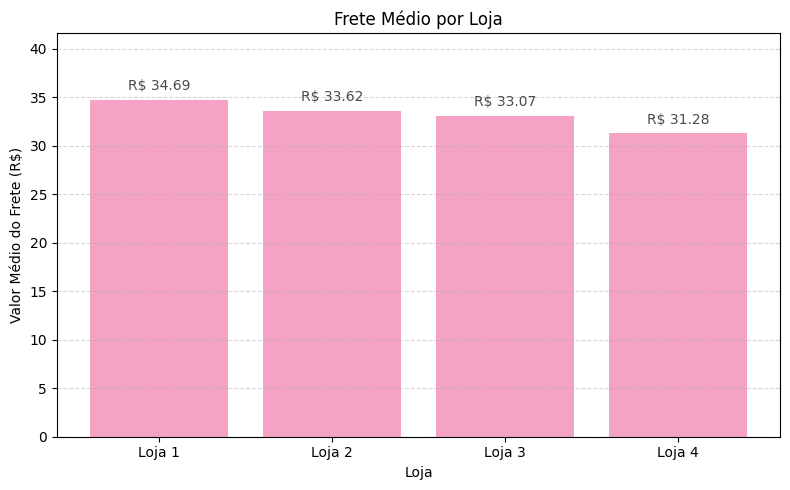

In [29]:
# Frete médio por loja (como o cliente paga, menor é melhor)
frete_medio = (
    lojas.groupby('Loja')['Frete']
         .mean()
         .round(2)
         .sort_values(ascending=False)
)
display(frete_medio)

# Gráfico — barras verticais em rosa com rótulos
plt.figure(figsize=(8,5))
barras = plt.bar(frete_medio.index, frete_medio.values, color='#f4a3c4')

# Rótulos numéricos acima de cada barra
for b in barras:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h + (max(frete_medio.values)*0.02),
             f'R$ {h:.2f}', ha='center', va='bottom', fontsize=10, color='#4a4a4a')

plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.ylim(0, max(frete_medio.values)*1.20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##Recomendação

In [14]:
# Tabela resumo
resumo = lojas.groupby('Loja').agg(
    Faturamento_Total=('Faturamento','sum'),
    Qtde_Vendas=('Produto','count'),
    Avaliacao_Media=('Avaliação da compra','mean'),
    Frete_Medio=('Frete','mean')
).round(2)

# Score simples (quanto maior, melhor)
def minmax(s):
    return (s - s.min())/(s.max()-s.min()) if s.max()!=s.min() else 0.5

score = (
    0.4*minmax(resumo['Faturamento_Total']) +
    0.3*minmax(resumo['Avaliacao_Media']) +
    0.2*(1 - minmax(resumo['Frete_Medio'])) +
    0.1*minmax(resumo['Qtde_Vendas'])
)
resumo['Score_Eficiencia'] = (score*100).round(1)
display(resumo.sort_values('Score_Eficiencia', ascending=False))

# Identificar loja com menor desempenho
pior_loja = resumo['Score_Eficiencia'].idxmin()
print(f"\nRECOMENDAÇÃO FINAL:\nVender a {pior_loja}, pois apresenta o menor desempenho geral.")


,Faturamento_Total,Qtde_Vendas,Avaliacao_Media,Frete_Medio,Score_Eficiencia
Loja,,,,,
Loja 3,"1,542,047.69",2359,4.05,33.07,70.70
Loja 2,"1,567,773.22",2359,4.04,33.62,69.70
Loja 1,"1,616,347.09",2359,3.98,34.69,50.00
Loja 4,"1,458,253.46",2358,4.00,31.28,28.60



RECOMENDAÇÃO FINAL:
Vender a Loja 4, pois apresenta o menor desempenho geral.


##Validações


In [45]:
import numpy as np

print("🔎 VALIDAÇÃO COM VALORES DA BASE\n")

# Garantias mínimas
if 'Faturamento' not in lojas.columns:
    lojas['Faturamento'] = lojas['Preço'] + lojas['Frete']

# 1) Totais de vendas
total_geral = len(lojas)
vc_loja = lojas['Loja'].value_counts().sort_index()
print("1) Total de vendas (todas as lojas):", int(total_geral))
for loja, qt in vc_loja.items():
    print(f"   - {loja}: {int(qt)} vendas")
print(f"   Soma por loja: {int(vc_loja.sum())}\n")

# 2) Faturamento
fat_por_loja = lojas.groupby('Loja')['Faturamento'].sum().sort_index()
fat_total = fat_por_loja.sum()
print("2) Faturamento por loja (R$):")
for loja, v in fat_por_loja.items():
    print(f"   - {loja}: R$ {v:,.2f}")
print(f"   Faturamento total: R$ {fat_total:,.2f}\n")

# 3) Checagem de dados inválidos
nulos = lojas[['Preço','Frete','Faturamento','Avaliação da compra']].isna().sum()
neg_preco = (lojas['Preço'] < 0).sum()
neg_frete = (lojas['Frete'] < 0).sum()
neg_fat = (lojas['Faturamento'] < 0).sum()
print("3) Valores nulos por coluna:")
for col, qt in nulos.items():
    print(f"   - {col}: {int(qt)}")
print("   Valores negativos:")
print(f"   - Preço: {int(neg_preco)}  - Frete: {int(neg_frete)}  - Faturamento: {int(neg_fat)}\n")

# 4) Médias (base)
media_preco = lojas['Preço'].mean()
media_frete = lojas['Frete'].mean()
media_av = lojas['Avaliação da compra'].mean()
print("4) Médias gerais da base:")
print(f"   - Preço médio: R$ {media_preco:,.2f}")
print(f"   - Frete médio: R$ {media_frete:,.2f}")
print(f"   - Avaliação média: {media_av:.2f}\n")

# 5) Produtos mais e menos vendidos por loja (com quantidades)
grp_lp = (lojas.groupby(['Loja','Produto'])['Produto']
               .count()
               .rename('Qtde')
               .reset_index())

print("5) Produtos destaque por loja:")
for loja in sorted(lojas['Loja'].unique()):
    df_loja = grp_lp[grp_lp['Loja'] == loja].sort_values('Qtde', ascending=False)
    prod_max = df_loja.iloc[0]['Produto']
    q_max = int(df_loja.iloc[0]['Qtde'])
    prod_min = df_loja.iloc[-1]['Produto']
    q_min = int(df_loja.iloc[-1]['Qtde'])
    print(f"   - {loja}:")
    print(f"       • Mais vendido: {prod_max}  | Qtde: {q_max}")
    print(f"       • Menos vendido: {prod_min} | Qtde: {q_min}")
print()

# 6) Ticket médio por loja (opcional, útil p/ sanity check)
ticket_por_loja = lojas.groupby('Loja')['Faturamento'].mean().sort_index()
print("6) Ticket médio por loja (R$):")
for loja, v in ticket_por_loja.items():
    print(f"   - {loja}: R$ {v:,.2f}")

print("\n✅ Fim da validação.")


🔎 VALIDAÇÃO COM VALORES DA BASE

1) Total de vendas (todas as lojas): 9435
   - Loja 1: 2359 vendas
   - Loja 2: 2359 vendas
   - Loja 3: 2359 vendas
   - Loja 4: 2358 vendas
   Soma por loja: 9435

2) Faturamento por loja (R$):
   - Loja 1: R$ 1,616,347.09
   - Loja 2: R$ 1,567,773.22
   - Loja 3: R$ 1,542,047.69
   - Loja 4: R$ 1,458,253.46
   Faturamento total: R$ 6,184,421.45

3) Valores nulos por coluna:
   - Preço: 0
   - Frete: 0
   - Faturamento: 0
   - Avaliação da compra: 0
   Valores negativos:
   - Preço: 0  - Frete: 0  - Faturamento: 0

4) Médias gerais da base:
   - Preço médio: R$ 622.31
   - Frete médio: R$ 33.17
   - Avaliação média: 4.01

5) Produtos destaque por loja:
   - Loja 1:
       • Mais vendido: TV Led UHD 4K  | Qtde: 60
       • Menos vendido: Headset | Qtde: 33
   - Loja 2:
       • Mais vendido: Iniciando em programação  | Qtde: 65
       • Menos vendido: Jogo de tabuleiro | Qtde: 32
   - Loja 3:
       • Mais vendido: Kit banquetas  | Qtde: 57
       • Me